#📌 Extracción

In [38]:
import pandas as pd

try:
    datos = pd.read_csv('https://raw.githubusercontent.com/Fernando-Falla/Cahllenge_TelecomX_parte2/refs/heads/main/datos_telecom_modificado.csv')
    display(datos.head(10))
except FileNotFoundError:
    print("The file was not downloaded correctly. Please check the GitHub URL.")

,Abandono,Género,AdultoMayor,Pareja,Dependientes,PermanenciaMeses,ServicioTeléfono,LíneasMúltiples,SeguridadEnLínea,RespaldoEnLínea,...,Internet_FibraÓptica,Contrato_Mensual,Contrato_1Año,Contrato_2Años,Pago_TransferenciaAutomática,Pago_TarjetaAutomática,Pago_ChequeElectrónico,Pago_ChequeCorreo,CargoDiario,Abandono_Label
0,0,0,0,1,1,-0.950200,1,0,0,1,...,0,0,1,0,0,0,0,1,0.029206,Permanencia
1,0,1,0,0,0,-0.950200,1,1,0,0,...,0,1,0,0,0,0,0,1,-0.159990,Permanencia
2,1,1,0,0,0,-1.153700,1,0,0,0,...,1,1,0,0,0,0,1,0,0.304702,Abandono
3,1,1,1,1,0,-0.787401,1,0,0,1,...,1,1,0,0,0,0,1,0,1.104635,Abandono
4,1,0,1,1,0,-1.194400,1,0,0,0,...,1,1,0,0,0,0,0,1,0.636624,Abandono
5,0,0,0,0,1,-0.950200,1,0,0,0,...,0,1,0,0,0,1,0,0,0.155337,Permanencia
6,0,0,1,1,0,1.573194,1,0,1,1,...,1,0,0,1,1,0,0,0,1.492985,Permanencia
7,0,1,0,1,0,1.247595,1,1,1,0,...,1,0,0,1,0,1,0,0,0.661519,Permanencia
8,0,0,1,0,0,-1.031600,1,0,1,0,...,0,1,0,0,0,0,1,0,-0.548340,Permanencia
9,0,0,0,1,1,1.328994,1,1,1,1,...,0,0,0,1,0,0,0,1,0.854034,Permanencia


In [39]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Abandono                      7267 non-null   int64  
 1   Género                        7267 non-null   int64  
 2   AdultoMayor                   7267 non-null   int64  
 3   Pareja                        7267 non-null   int64  
 4   Dependientes                  7267 non-null   int64  
 5   PermanenciaMeses              7267 non-null   float64
 6   ServicioTeléfono              7267 non-null   int64  
 7   LíneasMúltiples               7267 non-null   int64  
 8   SeguridadEnLínea              7267 non-null   int64  
 9   RespaldoEnLínea               7267 non-null   int64  
 10  ProtecciónDispositivo         7267 non-null   int64  
 11  SoporteTécnico                7267 non-null   int64  
 12  StreamingTV                   7267 non-null   int64  
 13  Str

In [40]:
datos.dtypes

,0
Abandono,int64
Género,int64
AdultoMayor,int64
Pareja,int64
Dependientes,int64
PermanenciaMeses,float64
ServicioTeléfono,int64
LíneasMúltiples,int64
SeguridadEnLínea,int64
RespaldoEnLínea,int64


# Calculo de la proporcion de Abandonos vs Permanencias

In [41]:
# Calculate the proportion of churned vs. retained customers
churn_counts = datos['Abandono_Label'].value_counts()
churn_proportion = churn_counts / len(datos)

print("Proporción de clientes por estado de abandono:")
display(churn_proportion)

# Evaluate class imbalance
print("\nEvaluación de desbalance de clases:")
if churn_proportion.min() / churn_proportion.max() < 0.5:  # A simple threshold for imbalance
    print("Existe un desbalance significativo entre las clases.")
else:
    print("No existe un desbalance significativo entre las clases.")

Proporción de clientes por estado de abandono:


,count
Abandono_Label,
Permanencia,0.74281
Abandono,0.25719



Evaluación de desbalance de clases:
Existe un desbalance significativo entre las clases.


# Aplicando SMOTE  para balancear los datos de entrenamiento. La distribución de clases ahora es igual para 'Permanencia' y 'Abandono'.



## Separacion de datos

In [42]:
# Install imbalanced-learn library
!pip install imbalanced-learn

## Aplicacion de SMOTE

In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming 'datos' is your DataFrame and 'Abandono' is your target variable (numerical)
# If 'Abandono_Label' is your target, you'll need to encode it first (e.g., using LabelEncoder or get_dummies)
# For demonstration, let's use 'Abandono' (assuming 0 for Permanencia and 1 for Abandono)
X = datos.drop(['Abandono', 'Abandono_Label'], axis=1) # Features
y = datos['Abandono'] # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display the class distribution before and after SMOTE
print("Class distribution before SMOTE:")
display(y_train.value_counts())

print("\nClass distribution after SMOTE:")
display(y_train_resampled.value_counts())

Class distribution before SMOTE:


,count
Abandono,
0,4318
1,1495



Class distribution after SMOTE:


,count
Abandono,
0,4318
1,4318


# Parte 2


## Evaluación de Normalización/Estandarización

Como se mencionó, la necesidad de escalar los datos (normalización o estandarización) depende del tipo de modelo de machine learning que se utilizará:

*   **Modelos basados en distancia:** Modelos como KNN, SVM, Regresión Logística y Redes Neuronales son sensibles a la escala de las características. Para estos modelos, es crucial normalizar o estandarizar los datos para que todas las características tengan un rango similar. La **estandarización** (restar la media y dividir por la desviación estándar) es una opción común que resulta en datos con media 0 y desviación estándar 1. La **normalización** (escalar los datos a un rango específico, generalmente [0, 1]) es otra opción.

*   **Modelos basados en árboles:** Modelos como Decision Tree, Random Forest y XGBoost no son sensibles a la escala de las características. Estos modelos toman decisiones basadas en umbrales en las características individuales, por lo que la escala no afecta la estructura del árbol. Para estos modelos, el escalado de datos no es necesario y no mejorará el rendimiento.

Dado que no hemos decidido el modelo final, es una buena práctica tener el código para la estandarización a mano si planeamos usar modelos basados en distancia.

In [44]:
from sklearn.preprocessing import StandardScaler

# Inicializar el estandarizador
scaler = StandardScaler()

# Estandarizar las características en los conjuntos de entrenamiento y prueba
# Es importante ajustar el scaler solo en los datos de entrenamiento para evitar la fuga de información del conjunto de prueba
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

print("Datos de entrenamiento reescalados:")
display(X_train_resampled_scaled[:5]) # Mostrar las primeras 5 filas de los datos reescalados

print("\nDatos de prueba reescalados:")
display(X_test_scaled[:5]) # Mostrar las primeras 5 filas de los datos reescalados

Datos de entrenamiento reescalados:


array([[-0.96427818, -0.45718248,  1.18698192,  1.83227043,  0.646884  ,
         0.32694903,  1.19437193, -0.53629279, -0.64531722, -0.66916269,
        -0.53700869, -0.79822077, -0.80895373,  0.76173347, -1.51233824,
        -0.47718075, -0.66590017, -1.05598837, -1.39442659,  2.28025641,
        -0.44789698,  2.11982044, -0.45977179, -0.83446201, -0.50466371,
        -1.51233824],
       [-0.96427818, -0.45718248,  1.18698192, -0.54577096, -0.27214535,
         0.32694903,  1.19437193, -0.53629279, -0.64531722, -0.66916269,
        -0.53700869, -0.79822077,  1.23616465,  0.76173347,  0.64280165,
        -0.10066975, -0.66590017,  0.94698013,  0.71714066, -0.43854717,
        -0.44789698, -0.47173807, -0.45977179,  1.1983769 , -0.50466371,
         0.64280165],
       [ 1.03704514, -0.45718248,  1.18698192,  1.83227043,  1.14817274,
         0.32694903,  1.19437193, -0.53629279, -0.64531722, -0.66916269,
        -0.53700869, -0.79822077,  1.23616465, -1.31279515,  0.60806934,
       


Datos de prueba reescalados:


array([[-0.96427818, -0.45718248,  1.18698192,  1.83227043, -0.89875628,
         0.32694903, -0.83726013,  1.86465306,  1.54962547, -0.66916269,
        -0.53700869, -0.79822077, -0.80895373, -1.31279515, -0.42000706,
        -0.76701411,  1.50172661, -1.05598837,  0.71714066, -0.43854717,
        -0.44789698, -0.47173807,  2.17499209, -0.83446201, -0.50466371,
        -0.42000706],
       [ 1.03704514, -0.45718248, -0.84247281,  1.83227043, -1.10762658,
         0.32694903,  1.19437193, -0.53629279, -0.64531722, -0.66916269,
        -0.53700869,  1.25278624,  1.23616465,  0.76173347,  0.87898136,
        -0.89261011, -0.66590017,  0.94698013,  0.71714066, -0.43854717,
        -0.44789698, -0.47173807, -0.45977179,  1.1983769 , -0.50466371,
         0.87898136],
       [ 1.03704514, -0.45718248, -0.84247281,  1.83227043,  0.47978776,
        -3.05858073, -0.83726013,  1.86465306, -0.64531722, -0.66916269,
         1.86216724,  1.25278624, -0.80895373, -1.31279515, -0.79685263,
       

# Matriz de Correlacion

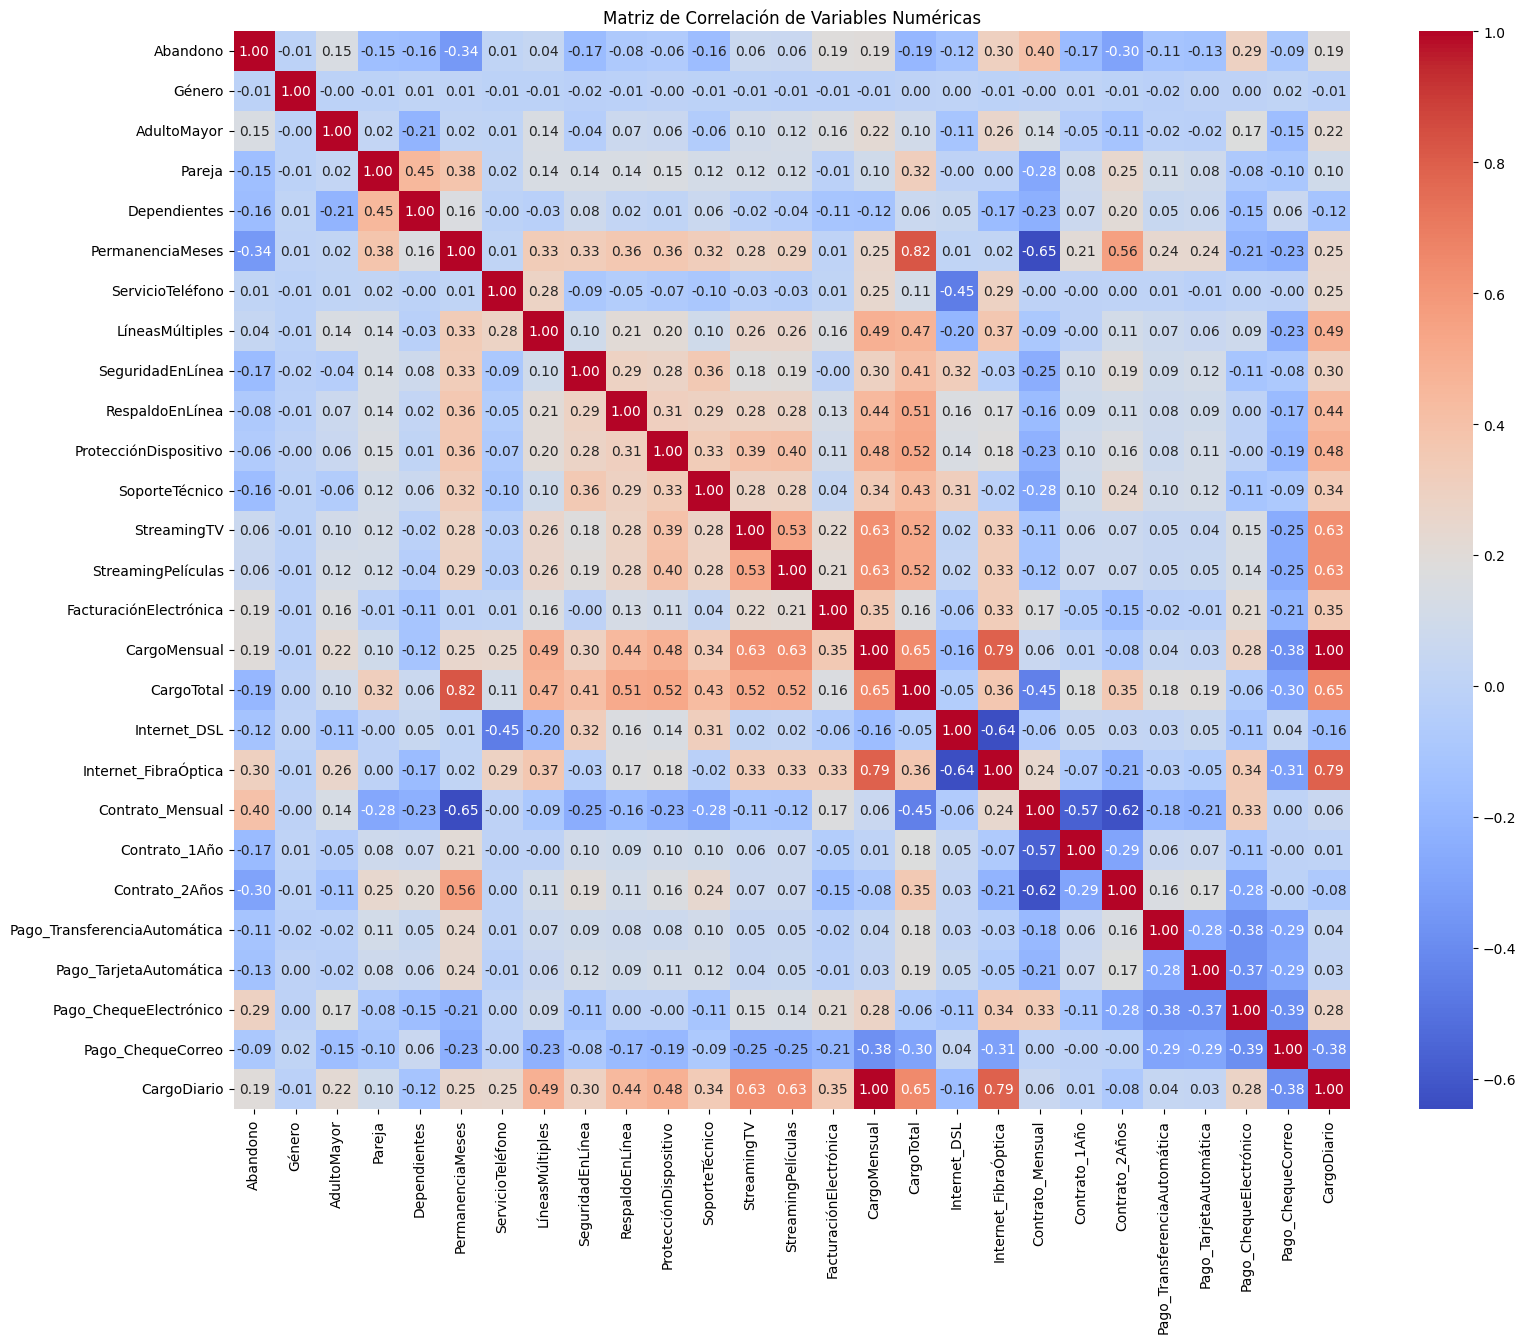


Correlación con la variable 'Abandono':


,Abandono
Abandono,1.000000
Contrato_Mensual,0.395584
Internet_FibraÓptica,0.300949
Pago_ChequeElectrónico,0.294626
CargoDiario,0.189866
CargoMensual,0.189866
FacturaciónElectrónica,0.186666
AdultoMayor,0.146733
StreamingTV,0.062430
StreamingPelículas,0.060586


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
datos_numericos = datos.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
matriz_correlacion = datos_numericos.corr()

# Visualizar la matriz de correlación usando un mapa de calor (heatmap)
plt.figure(figsize=(18, 14)) # Ajusta el tamaño de la figura si es necesario
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# Opcional: Mostrar la correlación con la variable 'Abandono' específicamente
print("\nCorrelación con la variable 'Abandono':")
display(matriz_correlacion['Abandono'].sort_values(ascending=False))

### Proporción de Abandono por Tipo de Contrato

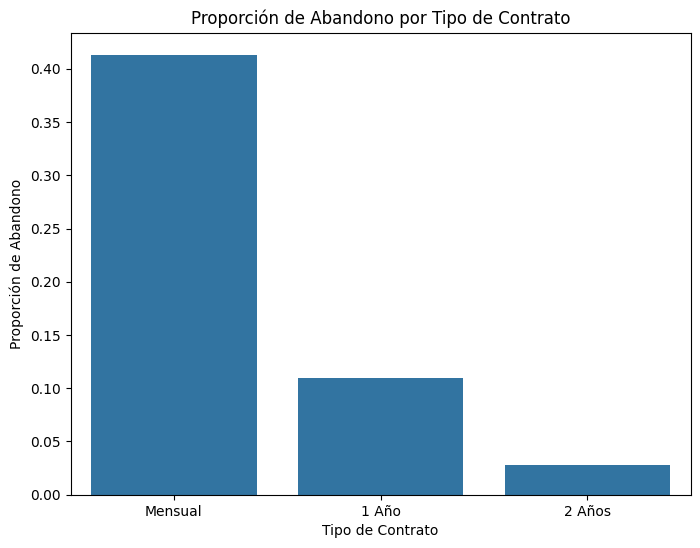

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the contract columns to have a single 'Contract_Type' column
contract_melted = datos.melt(id_vars=['Abandono', 'Abandono_Label'],
                             value_vars=['Contrato_Mensual', 'Contrato_1Año', 'Contrato_2Años'],
                             var_name='Contract_Type',
                             value_name='Is_Contract_Type')

# Filter for rows where the customer has that contract type
contract_melted = contract_melted[contract_melted['Is_Contract_Type'] == 1]

# Map the melted column names to more readable labels
contract_melted['Contract_Type'] = contract_melted['Contract_Type'].map({
    'Contrato_Mensual': 'Mensual',
    'Contrato_1Año': '1 Año',
    'Contrato_2Años': '2 Años'
})

# Create a bar plot to show the proportion of churn for each contract type
plt.figure(figsize=(8, 6))
sns.barplot(x='Contract_Type', y='Abandono', data=contract_melted, errorbar=None)
plt.title('Proporción de Abandono por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Proporción de Abandono')
plt.show()

#### Hemos visualizado la proporción de abandono por tipo de contrato y se observa una clara tendencia: los clientes con contratos mensuales tienen una tasa de abandono significativamente mayor que aquellos con contratos a 1 o 2 años. Esto confirma que el tipo de contrato es un factor importante relacionado con el abandono.

### Proporción de Abandono por Servicio de Internet Fibra Óptica

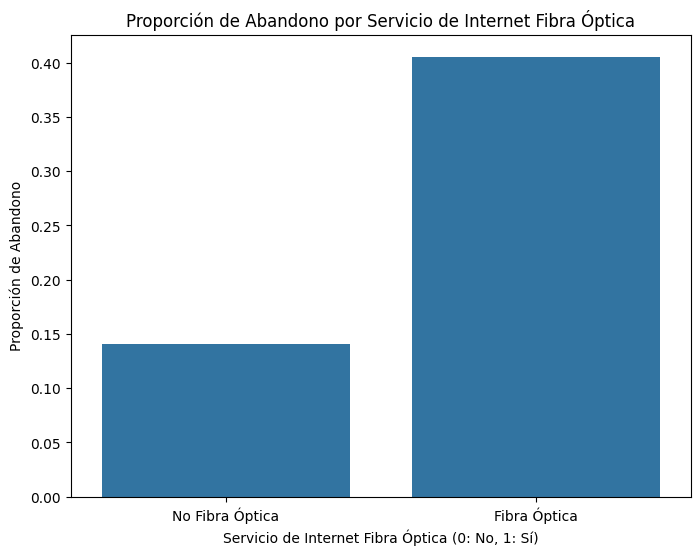

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot to show the proportion of churn for customers with and without Fiber Optic Internet
plt.figure(figsize=(8, 6))
sns.barplot(x='Internet_FibraÓptica', y='Abandono', data=datos, errorbar=None)
plt.title('Proporción de Abandono por Servicio de Internet Fibra Óptica')
plt.xlabel('Servicio de Internet Fibra Óptica (0: No, 1: Sí)')
plt.ylabel('Proporción de Abandono')
plt.xticks([0, 1], ['No Fibra Óptica', 'Fibra Óptica'])
plt.show()

## Distribución de Cargo Total por Estado de Abandono

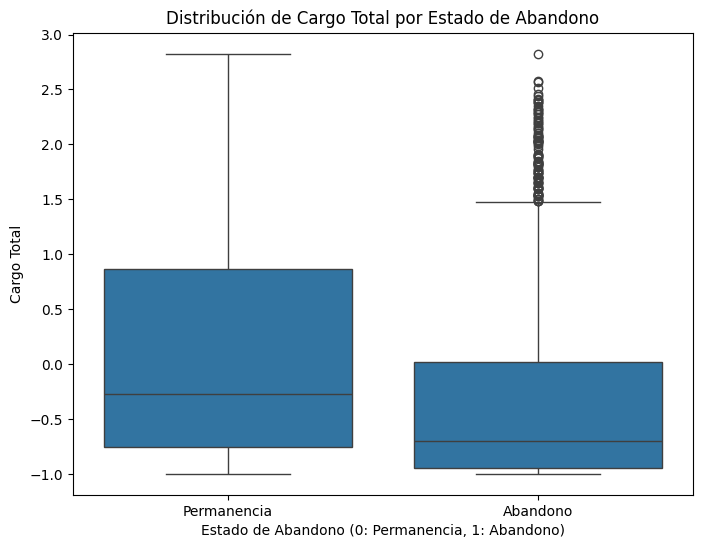

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to visualize the relationship between Total Charges and Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Abandono', y='CargoTotal', data=datos)
plt.title('Distribución de Cargo Total por Estado de Abandono')
plt.xlabel('Estado de Abandono (0: Permanencia, 1: Abandono)')
plt.ylabel('Cargo Total')
plt.xticks([0, 1], ['Permanencia', 'Abandono'])
plt.show()

## Modelado Predictivo

Vamos a construir dos modelos para predecir el abandono de clientes.



## Modelo 1: Regresión Logística (requiere estandarización)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Inicializar y entrenar el modelo de Regresión Logística con los datos estandarizados
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_resampled_scaled, y_train_resampled)

# Predecir en el conjunto de prueba estandarizado
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluar el modelo
print("Evaluación del modelo de Regresión Logística:")
print(classification_report(y_test, y_pred_log_reg))
print("Matriz de Confusión:")
display(confusion_matrix(y_test, y_pred_log_reg))
print("ROC-AUC Score:")
display(roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1]))

Evaluación del modelo de Regresión Logística:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1080
           1       0.54      0.72      0.62       374

    accuracy                           0.77      1454
   macro avg       0.71      0.75      0.73      1454
weighted avg       0.80      0.77      0.78      1454

Matriz de Confusión:


array([[849, 231],
       [104, 270]])

ROC-AUC Score:


np.float64(0.8379542978807685)

### Modelo 2: Random Forest (no requiere estandarización)

In [50]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar y entrenar el modelo Random Forest con los datos sin estandarizar
# Usamos los datos resampleados para el entrenamiento debido al desbalance de clases
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predecir en el conjunto de prueba sin estandarizar
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo
print("Evaluación del modelo Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Matriz de Confusión:")
display(confusion_matrix(y_test, y_pred_rf))
print("ROC-AUC Score:")
display(roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

Evaluación del modelo Random Forest:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1080
           1       0.54      0.62      0.58       374

    accuracy                           0.77      1454
   macro avg       0.70      0.72      0.71      1454
weighted avg       0.78      0.77      0.77      1454

Matriz de Confusión:


array([[883, 197],
       [143, 231]])

ROC-AUC Score:


np.float64(0.8165961081402258)

## Curvas ROC de los Modelos Predictivos

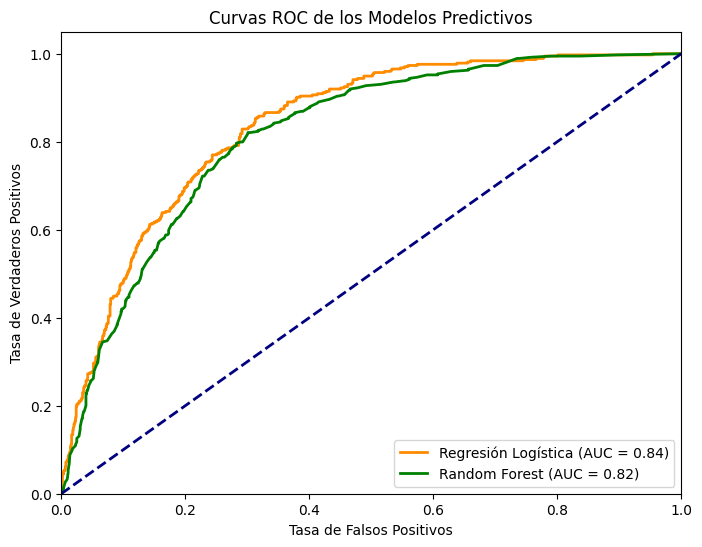

In [51]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC for Logistic Regression
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

# Calculate ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, color='darkorange', lw=2, label=f'Regresión Logística (AUC = {roc_auc_log_reg:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC de los Modelos Predictivos')
plt.legend(loc="lower right")
plt.show()

## Importancia de Características

Analicemos las variables más relevantes identificadas por cada modelo.

In [52]:
# Importancia de características en Regresión Logística
# Los coeficientes indican la dirección e intensidad de la relación con la variable objetivo (después de la estandarización)
# Un coeficiente positivo alto indica que a medida que aumenta el valor de la característica, aumenta la probabilidad de abandono
# Un coeficiente negativo alto indica que a medida que aumenta el valor de la característica, disminuye la probabilidad de abandono

feature_importance_log_reg = pd.Series(log_reg.coef_[0], index=X.columns)

print("Importancia de Características (Coeficientes) en Regresión Logística:")
display(feature_importance_log_reg.sort_values(ascending=False))

Importancia de Características (Coeficientes) en Regresión Logística:


,0
CargoMensual,3.985418
CargoDiario,3.985418
CargoTotal,1.111641
FacturaciónElectrónica,0.118751
AdultoMayor,-0.027361
Pareja,-0.068763
Género,-0.140089
Dependientes,-0.181106
LíneasMúltiples,-0.685909
ProtecciónDispositivo,-0.706590


In [53]:
# Importancia de características en Random Forest
# La importancia se basa en la reducción de la impureza que cada característica aporta a los árboles

feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns)

print("\nImportancia de Características en Random Forest:")
display(feature_importance_rf.sort_values(ascending=False))


Importancia de Características en Random Forest:


,0
CargoTotal,0.134611
PermanenciaMeses,0.132089
CargoDiario,0.123882
CargoMensual,0.118658
Contrato_Mensual,0.086630
Contrato_2Años,0.051837
Internet_FibraÓptica,0.038120
SoporteTécnico,0.027306
SeguridadEnLínea,0.026249
Contrato_1Año,0.024332


# Informe

#Informe de Análisis de Abandono de Clientes
Resumen de la Exploración Inicial: Durante la exploración inicial de los datos, se identificó un desbalance significativo en la variable objetivo 'Abandono_Label'. La proporción de clientes que permanecen ('Permanencia') es del 0.74, mientras que la proporción de clientes que abandonan ('Abandono') es del 0.26. Este desbalance de clases fue abordado posteriormente aplicando SMOTE a los datos de entrenamiento.


Análisis de Correlación
El análisis de correlación de las variables numéricas con la variable 'Abandono' reveló varias relaciones clave:

Las variables con mayor correlación positiva con el abandono incluyen 'Contrato_Mensual' (0.40), 'Internet_FibraÓptica' (0.30), 'Pago_ChequeElectrónico' (0.29), y 'CargoDiario'/'CargoMensual' (0.19).
Las variables con mayor correlación negativa con el abandono incluyen 'PermanenciaMeses' (-0.34), 'Contrato_2Años' (-0.30), y 'CargoTotal' (-0.19).
Visualizaciones Clave y sus Hallazgos
Las visualizaciones específicas confirmaron algunas de estas relaciones:

Proporción de Abandono por Tipo de Contrato: El gráfico de barras mostró claramente que los clientes con contratos mensuales ('Mensual') tienen una tasa de abandono considerablemente más alta en comparación con aquellos con contratos a 1 o 2 años. Esto sugiere que los contratos a más largo plazo están asociados con una mayor retención.

Proporción de Abandono por Servicio de Internet Fibra Óptica: El gráfico de barras indicó que los clientes que tienen el servicio de internet Fibra Óptica presentan una mayor proporción de abandono en comparación con aquellos que no lo tienen. Esto podría indicar problemas con la calidad del servicio o la satisfacción del cliente con la fibra óptica.

Distribución de Cargo Total por Estado de Abandono: El boxplot mostró que los clientes que abandonan ('Abandono') tienden a tener valores de 'CargoTotal' más bajos en comparación con los clientes que permanecen ('Permanencia'). Esto podría ser un indicador de que los clientes con un menor gasto total son más propensos a irse.

Evaluación del Rendimiento de los Modelos
A continuación, se presentan las métricas de rendimiento para los modelos de Regresión Logística y Random Forest en el conjunto de prueba.

Modelo: Regresión Logística
Informe de Clasificación: precision recall f1-score support

       0       0.89      0.79      0.84      1080
       1       0.54      0.72      0.62       374

Exactitud                          0.77      1454
macro avg 0.71 0.75 0.73 1454 weighted avg 0.80 0.77 0.78 1454

Matriz de Confusión: [[849 231] [104 270]]

ROC-AUC Score: 0.84

Modelo: Random Forest
Informe de Clasificación: precision recall f1-score support

       0       0.86      0.82      0.84      1080
       1       0.54      0.62      0.58       374

Exactitud                          0.77      1454
macro avg 0.70 0.72 0.71 1454 weighted avg 0.78 0.77 0.77 1454

Matriz de Confusión: [[883 197] [143 231]]

ROC-AUC Score: 0.82

Interpretación de las Curvas ROC

La curva ROC muestra la capacidad de cada modelo para distinguir entre las clases positiva (Abandono) y negativa (Permanencia). El Área bajo la Curva (AUC) es una métrica agregada de rendimiento, donde un valor más cercano a 1 indica un mejor rendimiento. Para la Regresión Logística, el AUC es 0.84, y para Random Forest, el AUC es 0.82. En este caso, el modelo de Regresión Logística obtuvo un AUC ligeramente superior (0.84) en comparación con Random Forest (0.82), lo que sugiere que tuvo un rendimiento ligeramente mejor en la discriminación de clases en el conjunto de prueba. Visualmente, la curva de Regresión Logística se encuentra ligeramente por encima de la curva de Random Forest en la mayoría de los puntos, confirmando este resultado.

Considerando las métricas para clases desbalanceadas:

La Regresión Logística tiene una Precisión de 0.54 para la clase 1 (Abandono), un Recall de 0.72 y un F1-score de 0.62.

El Random Forest tiene una Precisión de 0.54 para la clase 1 (Abandono), un Recall de 0.62 y un F1-score de 0.58.
La Regresión Logística muestra un Recall más alto para la clase de abandono (0.72 vs 0.62), lo que significa que identifica una mayor proporción de clientes que realmente van a abandonar. Sin embargo, su Precisión para la clase de abandono es ligeramente menor (0.54 vs 0.54).

La elección del 'mejor' modelo dependerá de si priorizamos identificar a la mayor cantidad posible de clientes que abandonarán (Recall) o si preferimos que las predicciones de abandono sean lo más precisas posible (Precision). Ambos modelos tienen una precisión general similar (Regresión Logística: 0.77, Random Forest: 0.77).

Comparación de Importancia de Características por Modelo

Top Características en Regresión Logística (por valor absoluto del coeficiente): Internet_FibraÓptica 6.097205 CargoMensual 3.985418 CargoDiario 3.985418 Internet_DSL 2.792948 Pago_ChequeElectrónico 2.212229 Contrato_2Años 2.075182 Contrato_Mensual 2.017109 Pago_ChequeCorreo 1.998888 Pago_TransferenciaAutomática 1.906598 Pago_TarjetaAutomática 1.896640 dtype: float64

Top Características en Random Forest (por importancia): CargoTotal 0.134611 PermanenciaMeses 0.132089 CargoDiario 0.123882 CargoMensual 0.118658 Contrato_Mensual 0.086630 Contrato_2Años 0.051837 Internet_FibraÓptica 0.038120 SoporteTécnico 0.027306 SeguridadEnLínea 0.026249 Contrato_1Año 0.024332 dtype: float64

Variables consistentemente importantes en ambos modelos:

Las siguientes variables se encuentran en el top 10 de importancia para ambos modelos:

Internet_FibraÓptica
CargoMensual
CargoDiario
Contrato_2Años
Contrato_Mensual

Discrepancias y Observaciones:
'CargoMensual' y 'CargoDiario': Ambos modelos identifican 'CargoMensual' y 'CargoDiario' como muy importantes. En Regresión Logística tienen los coeficientes más altos (en valor absoluto), y en Random Forest están en el top 4. Esto sugiere que el costo del servicio es un factor clave en el abandono.

'Internet_FibraÓptica': La Regresión Logística le asigna una importancia muy alta (el coeficiente negativo más grande), mientras que Random Forest la coloca más abajo en su ranking (top 7). Esto podría deberse a que la Regresión Logística es más sensible a la relación lineal (o log-odds) de esta característica, mientras que Random Forest captura interacciones no lineales con otras características.

Variables de Contrato ('Contrato_Mensual', 'Contrato_2Años'): Ambos modelos reconocen la importancia de los términos del contrato. Regresión Logística les asigna coeficientes negativos significativos (indicando que contratos más largos reducen el abandono), y Random Forest los incluye en su top 10.

'Contrato_Mensual' es particularmente importante en ambos.

'PermanenciaMeses' (Tenure): Ambos modelos la identifican como una variable muy importante y con una relación negativa con el abandono (a mayor permanencia, menor probabilidad de abandono).

'CargoTotal': Ambos modelos la consideran importante, aunque la Regresión Logística le asigna un coeficiente positivo, mientras que la correlación inicial fue negativa. La interpretación de los coeficientes de Regresión Logística es más compleja en presencia de otras variables correlacionadas. Random Forest la sitúa como la característica más importante.

Variables de Servicio Adicional (SeguridadEnLínea, SoporteTécnico, etc.): Random Forest les da cierta importancia, mientras que en Regresión Logística sus coeficientes son menores en comparación con otras variables clave. Esto podría sugerir que estas características tienen efectos más complejos o interactúan con otras variables de formas que Random Forest es mejor capturando.

Variables Demográficas (Género, AdultoMayor, Pareja, Dependientes): Generalmente, estas variables muestran una menor importancia en ambos modelos en comparación con las variables de servicio y contrato, lo que sugiere que los factores relacionados con el servicio son más predictivos del abandono.

Factores Clave que Influyen en el Abandono de Clientes
Basado en el análisis de exploración de datos, correlación y la importancia de las características de los modelos de Regresión Logística y Random Forest, los siguientes factores se identifican como los principales impulsores del abandono de clientes:

Tipo de Contrato:

Los clientes con contratos mensuales muestran una probabilidad de abandono significativamente mayor.
Los contratos a largo plazo (1 y 2 años) están fuertemente asociados con una menor tasa de abandono.
Tanto el análisis de correlación como la importancia de características de ambos modelos resaltan la gran influencia de esta variable.
Permanencia del Cliente (PermanenciaMeses):

Existe una fuerte correlación negativa con el abandono: los clientes con mayor antigüedad son menos propensos a abandonar.
Esta variable es consistentemente una de las más importantes en ambos modelos predictivos.

Cargos y Costos del Servicio:

El Cargo Mensual (CargoMensual) y el Cargo Diario (CargoDiario) tienen una correlación positiva con el abandono y son consistentemente importantes en ambos modelos, sugiriendo que costos más altos pueden ser un factor de insatisfacción.
El Cargo Total (CargoTotal) muestra una correlación negativa con el abandono, y Random Forest lo identifica como la característica más importante, lo que podría indicar que los clientes con un menor gasto total acumulado son más propensos a irse.

Servicio de Internet (especialmente Fibra Óptica):

El servicio de Internet Fibra Óptica muestra una correlación positiva con el abandono y es identificado como muy importante por la Regresión Logística (aunque menos por Random Forest). Esto podría señalar problemas específicos con la calidad o la percepción del valor del servicio de fibra óptica.
La ausencia de ciertos servicios de seguridad o soporte en línea (como SeguridadEnLínea, RespaldoEnLínea, SoporteTécnico) también parece aumentar la probabilidad de abandono, según la correlación y la importancia en Random Forest.

Método de Pago (Cheque Electrónico):

El Pago por Cheque Electrónico tiene una correlación positiva con el abandono y es una característica importante en ambos modelos, sugiriendo que los clientes que utilizan este método son más propensos a irse.

Otros factores como las características demográficas (Género, AdultoMayor, Pareja, Dependientes) parecen tener una influencia comparativamente menor en el abandono, según el análisis de importancia de características.


Estrategias de Retención Propuestas

Basado en los factores clave que influyen en el abandono identificados, se proponen las siguientes estrategias de retención:

Incentivar Contratos a Largo Plazo:

-Ofrecer descuentos significativos o beneficios adicionales (ej. meses gratis, mejoras de velocidad) a los clientes que se cambien de un contrato mensual a uno de 1 o 2 años.

-Crear paquetes promocionales atractivos que combinen servicios y un contrato a largo plazo a un precio preferencial.

-Implementar un programa de fidelización que recompense a los clientes a medida que su permanencia se extiende.

-Mejorar la Experiencia del Cliente con Fibra Óptica:

Investigar las causas detrás de la mayor tasa de abandono en clientes con Fibra Óptica. ¿Son problemas técnicos, de facturación, de atención al cliente?

-Implementar un plan de monitoreo proactivo para identificar y resolver problemas de servicio para clientes de fibra óptica antes de que escalen.

-Ofrecer soporte técnico especializado y prioritario para los usuarios de Fibra Óptica.

Gestionar los Cargos y Ofrecer Valor:

Analizar la estructura de precios, especialmente para los contratos mensuales y los clientes con cargos mensuales/diarios elevados, para asegurar que sean competitivos.

Considerar ofrecer descuentos temporales o ajustes en los planes a clientes con alto riesgo de abandono detectado por el modelo, especialmente aquellos con menor Cargo Total acumulado.

Comunicar claramente el valor de los servicios para justificar los cargos, destacando los beneficios y la calidad.

Optimizar la Experiencia de Pago y Monitorear Clientes con Cheque Electrónico:

Investigar por qué los clientes que pagan con Cheque Electrónico tienen una mayor propensión al abandono. ¿Hay problemas con el proceso, tarifas ocultas, o simplemente es un indicador de un segmento de clientes más volátil?

Promover métodos de pago alternativos (ej. domiciliación bancaria con tarjeta, transferencia automática) ofreciendo incentivos por cambiarse.
Implementar un seguimiento proactivo para los clientes que utilizan Cheque Electrónico, ofreciendo asistencia o recordatorios para evitar problemas de pago.

Enfocarse en la Retención Temprana y de Clientes a Largo Plazo:

Desarrollar programas de onboarding mejorados para nuevos clientes, asegurando una experiencia positiva desde el inicio para aumentar la permanencia inicial.

Crear un programa de reconocimiento o beneficios especiales para clientes de larga permanencia para reforzar su lealtad y reducir la probabilidad de que consideren a la competencia.

Promover Servicios Adicionales Clave:

Destacar los beneficios de servicios como SeguridadEnLínea, RespaldoEnLínea y SoporteTécnico en la comunicación con el cliente, ya que parecen estar asociados con una menor tasa de abandono (según Random Forest).

Considerar ofrecer paquetes combinados o pruebas gratuitas de estos servicios para fomentar su adopción.